<a href="https://colab.research.google.com/github/nireasir/auth-dws-ml2526/blob/main/MLex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import yfinance as yf
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor


In [2]:
ticker_symbol="DX-Y.NYB"
ticker=yf.Ticker(ticker_symbol)
df=ticker.history(period="5y").reset_index(drop=False)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,0,0.0,0.0
1,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,0,0.0,0.0
2,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,0,0.0,0.0
3,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,0,0.0,0.0
4,2020-11-12 00:00:00-05:00,93.010002,93.139999,92.779999,92.959999,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1253,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,0,0.0,0.0
1254,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,0,0.0,0.0
1255,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001,0,0.0,0.0
1256,2025-11-05 00:00:00-05:00,100.180000,100.360001,100.059998,100.199997,0,0.0,0.0


In [3]:
df=df.drop(columns=['Volume', 'Dividends', 'Stock Splits'])
df


,Date,Open,High,Low,Close
0,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
1,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
2,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000
3,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001
4,2020-11-12 00:00:00-05:00,93.010002,93.139999,92.779999,92.959999
...,...,...,...,...,...
1253,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003
1254,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003
1255,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001
1256,2025-11-05 00:00:00-05:00,100.180000,100.360001,100.059998,100.199997


# Ερώτημα 1

In [4]:

fig = px.line(df, x="Date", y=["Open","High","Low","Close"], title='Features line plot')
fig.show()

# Ερώτημα 2

Οι χρονοσειρές φαίνονται να είναι μή στατικές. Από τον Ιανουάριο του 21 μέχρι τον Ιούλιο του 22, οι χρονοσειρές έχουν ανοδική πορεία. Ύστερα έχουν μια μικρή πτώση και μετά μερικά "σκαμπανεβάσματα". Γενικότερα, οι τιμές των χρονοσειρών δεν είναι κοντά στο μέσο όρο.

# Ερώτημα 3

Το πρόβλημα εδώ είναι ότι θα μάθει να προβλέπει την αξία του δολαρίου κοντά στον μέσο όρο. Όταν αυτός ο μέσος όρος αλλάξει λόγο των αυξομειώσεων από τον Ιανουάριο του 2023 και μετά, τότε πιθανόν το μοντέλο να μη μπορέσει να προβλέψει κοντά στον καινούργιο μέσο όρο.

# Ερώτημα 4

In [5]:
fig2 = fig.update_xaxes(range=['2025-06-01', '2025-07-31'])
fig2.show()

Η μόνη τάση που παρατηρώ είναι μια μικρή πτώση της τιμής του δολαρίου προς τα τέλη Ιουνίου. Αυτό πιθανώς να οφείλεται στη γεωπολιτική σύγχυση που υπήρχε στη Μέση Ανατολή (στρατιωτικές συγκρούσεις Ισραήλ-Ιραν, στις οποίες συμμετείχε η Αμερική). Προς τα τέλη Ιουλίου, υπάρχει μια μικρή άνοδος στις προηγούμενες τιμές (ίσως λόγω της αποκλιμάκωσης των συγκρούσεων).

# Ερώτημα 5

Αν έχουμε ως πληροφορία μόνο τα σημερινά open,high,low,close, τότε θεωρώ πως δεν έχει νόημα να προβλέψουμε την αυριανή τιμή του δολαρίου, καθώς οι προβλέψεις δε θα είναι αξιόπιστες γιατί χρειαζόμαστε τις συγκεκριμένες πληροφορίες και για τις προηγούμενες μέρες, δηλαδή για την τάση της χρονοσειράς.

# Ερώτημα 6

Θεωρώ πως δεν έχει νόημα ένας τυχαίος διαχωρισμός των δεδομένων σε train και test γιατί οι τιμές στις χρονοσειρές εξαρτώνται από τις χρονικές περιόδους. Σε αυτή τη περίπτωση, χάνεται η χρονική σειρά, οπότε θα έχουμε δεδομένα στο train που χρονικά είναι μετά τα δεδομένα του test.

# Ερώτημα 7

In [6]:
df_train=df[df['Date']<'2024-01-01 00:00:00']
df_test=df[(df['Date']>='2024-01-01 00:00:00') & (df['Date']<'2025-01-01 00:00:00')]
df_train=df_train.drop(columns=['Date'])
df_test=df_test.drop(columns=['Date'])



# Ερώτημα 8

In [7]:
def create_timeframes(data_df, n):
    timeframes = []
    timeframe_targets = []
    data_array = data_df.to_numpy()

    for i in range(data_df.shape[0] - n):
        end = i + n
        timeframes.append(data_array[i: end])
        timeframe_targets.append(data_array[end][3])

    return np.array(timeframes), np.array(timeframe_targets)


# Ερώτημα 9

Αν θέλουμε να προβλέψουμε την επόμενη μέρα τότε το μέγεθος του timeframe θα πρέπει να είναι μικρό, καθώς έχουν μεγαλύτερη σημασία τα δεδομένα των πιο πρόσφατων ημερών (π.χ. 3-4 τελευταίες μέρες). Αντίθετα, αν θέλουμε να προβλέψουμε πιο μακρινό ορίζοντα, τότε το μέγεθος του timeframe πρέπει να είναι μεγάλο, καθώς το μοντέλο πρέπει να καταλάβει ποια ήταν η τάση της τιμής του δολαρίου αρκετές ημέρες πριν για να έχουμε αξιόπιστα αποτελέσματα.

# Ερώτημα 10

In [8]:
x_train, y_train = create_timeframes(df_train, 5)
x_test, y_test = create_timeframes(df_test, 5)
n = 5
num_features = df_train.shape[1]
x_train_flat = x_train.reshape((x_train.shape[0], n*num_features))
x_test_flat = x_test.reshape((x_test.shape[0], n*num_features))
print(x_train_flat.shape, x_test_flat.shape)
print(y_train.shape,y_test.shape)

(786, 20) (247, 20)
(786,) (247,)


# Ερώτημα 11

In [9]:
maetr=[]
maets=[]

In [10]:
model = LinearRegression()
model.fit(x_train_flat, y_train)
y_pred = model.predict(x_train_flat)
mae_trainset=mean_absolute_error(y_train,y_pred)
print(f'mae in train set={mae_trainset:.2f}')
y_pred = model.predict(x_test_flat)
mae_testset=mean_absolute_error(y_test,y_pred)
print(f'mae in test set={mae_testset:.2f}')
maetr.append(mae_trainset)
maets.append(mae_testset)


mae in train set=0.35
mae in test set=0.28


In [11]:
model=RandomForestRegressor()
model.fit(x_train_flat, y_train)
y_pred = model.predict(x_train_flat)
mae_trainset=mean_absolute_error(y_train,y_pred)
print(f'mae in train set={mae_trainset:.2f}')
y_pred = model.predict(x_test_flat)
mae_testset=mean_absolute_error(y_test,y_pred)
print(f'mae in test set={mae_testset:.2f}')
maetr.append(mae_trainset)
maets.append(mae_testset)

mae in train set=0.15
mae in test set=0.33


In [12]:
model=BaggingRegressor(estimator=LinearRegression())
model.fit(x_train_flat, y_train)
y_pred = model.predict(x_train_flat)
mae_trainset=mean_absolute_error(y_train,y_pred)
print(f'mae in train set={mae_trainset:.2f}')
y_pred = model.predict(x_test_flat)
mae_testset=mean_absolute_error(y_test,y_pred)
print(f'mae in test set={mae_testset:.2f}')
maetr.append(mae_trainset)
maets.append(mae_testset)


mae in train set=0.35
mae in test set=0.29


In [13]:
model=BayesianRidge()
model.fit(x_train_flat, y_train)
y_pred = model.predict(x_train_flat)
mae_trainset=mean_absolute_error(y_train,y_pred)
print(f'mae in train set={mae_trainset:.2f}')
y_pred = model.predict(x_test_flat)
mae_testset=mean_absolute_error(y_test,y_pred)
print(f'mae in test set={mae_testset:.2f}')
maetr.append(mae_trainset)
maets.append(mae_testset)


mae in train set=0.35
mae in test set=0.28


In [14]:
model = StackingRegressor(estimators=[('lr', LinearRegression()), ('dtr', DecisionTreeRegressor())])
model.fit(x_train_flat, y_train)
y_pred = model.predict(x_train_flat)
mae_trainset=mean_absolute_error(y_train,y_pred)
print(f'mae in train set={mae_trainset:.2f}')
y_pred = model.predict(x_test_flat)
mae_testset=mean_absolute_error(y_test,y_pred)
print(f'mae in test set={mae_testset:.2f}')
maetr.append(mae_trainset)
maets.append(mae_testset)


mae in train set=0.35
mae in test set=0.29


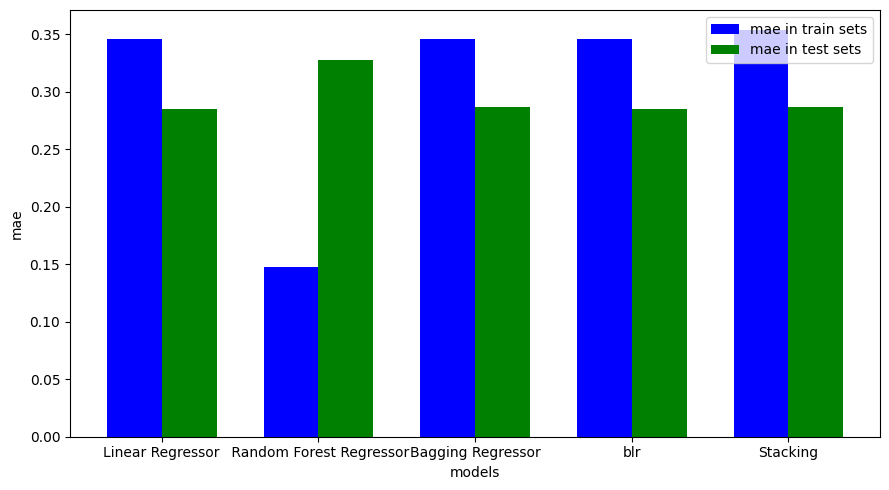

In [15]:
models = ['Linear Regressor', ' Random Forest Regressor', 'Bagging Regressor', 'blr', 'Stacking']
x = np.arange(len(models))
width = 0.35
plt.figure(figsize=(9,5))
plt.bar(x - width/2, maetr, width, label='mae in train sets', color='blue')
plt.bar(x + width/2, maets, width, label='mae in test sets', color='green')
plt.xlabel('models')
plt.ylabel('mae')
plt.xticks(x, models)
plt.legend()
plt.tight_layout()
plt.show()

Στο linear regressor, η προβλεπόμενη τιμή είναι γραμμικός συνδυασμός των χαρακτηριστικών.
Στο random forest regressor εκπαιδεύονται πολλά δέντρα απόφασης σε διάφορους συνδυασμούς παραδειγμάτων και χαρακτηριστικών και παίρνει τον μέσο όρο των προβλέψεων.
Στο bagging regressor εκπαιδεύονται πολλά μοντέλα linear regression σε διαφορετικά υποσύνολα των δεδομένων και συνδυάζει τα αποτελέσματα είτε με μέσο όρο είτε με πλειοψηφία.
Το blr δουλεύει παρόμοια με το linear regression αλλά οι συντελεστές υπολογίζονται με βάση πιθανότητες.
Το stacking regressor συνδυάζει δύο διαφορετικά μοντέλα, το linear και το decision tree, και εκπαιδεύεται για να συνδυάζει τις προβλέψεις για καλύτερο αποτέλεσμα.